In [8]:
import pandas as pd

In [10]:
df1 = pd.read_csv("202408-Cyclistic.csv")

In [5]:
df1.head(10)

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 15
0,028CFFCA5A1E5A25,electric_bike,8/28/24 21:00,8/28/24 21:01,4,31,NaN,NaN,NaN,NaN,41.940000,-87.670000,41.940000,-87.670000,casual,NaN
1,CAC721832F4A9662,electric_bike,8/2/24 22:27,8/2/24 22:27,6,31,NaN,NaN,NaN,NaN,41.890000,-87.620000,41.890000,-87.620000,casual,NaN
2,961FFD8AAF513637,electric_bike,8/2/24 21:05,8/2/24 21:05,6,31,NaN,NaN,NaN,NaN,41.900000,-87.670000,41.900000,-87.670000,casual,NaN
3,8F7FCA6B467EDFE4,electric_bike,8/20/24 18:01,8/20/24 18:02,3,31,NaN,NaN,NaN,NaN,41.880000,-87.640000,41.880000,-87.640000,casual,NaN
4,F5972062FEB99F17,electric_bike,8/17/24 13:27,8/17/24 13:28,7,31,NaN,NaN,NaN,NaN,41.870000,-87.620000,41.870000,-87.620000,casual,NaN
5,6E184367F489DAA7,electric_bike,8/17/24 15:01,8/17/24 15:01,7,31,NaN,NaN,NaN,NaN,41.920000,-87.630000,41.920000,-87.630000,casual,NaN
6,A4C7A3CA21BB4EF4,electric_bike,8/31/24 15:37,8/31/24 15:38,7,31,NaN,NaN,NaN,NaN,41.890000,-87.660000,41.890000,-87.660000,casual,NaN
7,87718733B5B50C82,electric_bike,8/31/24 12:26,8/31/24 12:27,7,31,DuSable Lake Shore Dr & Monroe St,13300,NaN,NaN,41.880958,-87.616743,41.870000,-87.620000,casual,NaN
8,F69210B20D64AB0B,electric_bike,8/27/24 14:04,8/27/24 14:05,3,31,900 W Harrison St,13028,NaN,NaN,41.874754,-87.649807,41.870000,-87.650000,member,NaN
9,D94B6CB25B1FE3D0,electric_bike,8/13/24 7:01,8/13/24 7:01,3,31,Whipple St & Roosevelt Rd,427,Whipple St & Roosevelt Rd,427,41.866554,-87.701329,41.866554,-87.701329,casual,NaN


In [7]:
import matplotlib.pyplot as plt

In [9]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [11]:
df1_weekday_count.head(14)

day_of_week  member_casual
7            casual           75401
5            member           71618
6            member           70669
7            member           66727
4            member           63563
3            member           57225
2            member           53135
6            casual           52330
1            casual           51061
             member           49127
5            casual           40237
4            casual           34021
2            casual           29296
3            casual           28627
Name: count, dtype: int64

In [13]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,7,casual,75401
1,5,member,71618
2,6,member,70669
3,7,member,66727
4,4,member,63563
5,3,member,57225
6,2,member,53135
7,6,casual,52330
8,1,casual,51061
9,1,member,49127


In [15]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1,51061.0,49127.0
2,29296.0,53135.0
3,28627.0,57225.0
4,34021.0,63563.0
5,40237.0,71618.0
6,52330.0,70669.0
7,75401.0,66727.0


In [17]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

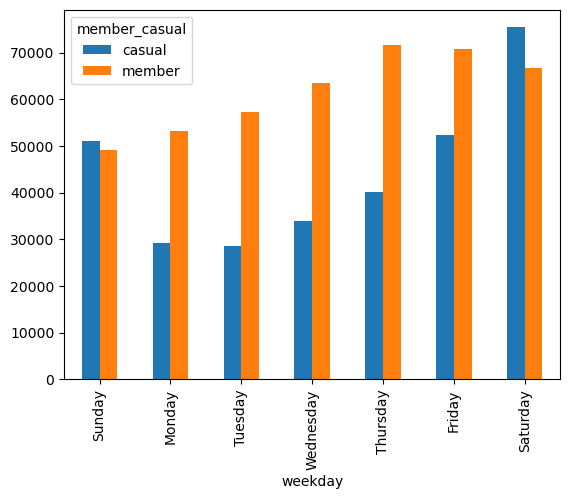

In [19]:
pivot_df1.plot(kind='bar' , x='weekday')

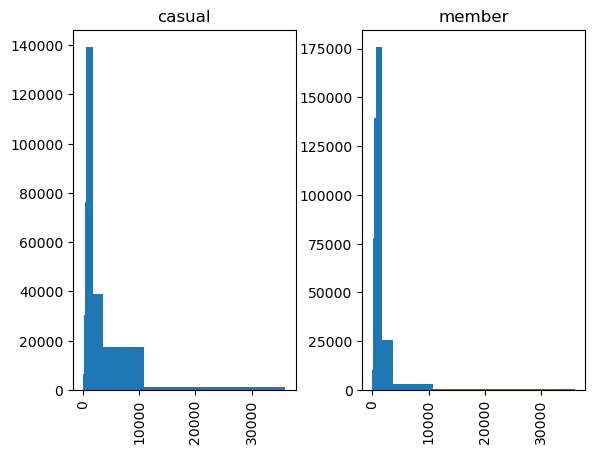

In [21]:
df1.hist(column='ride_length', bins=[30,120,300,600,1800,3600,10800,36000], by='member_casual')
plt.show()

In [23]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [25]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [27]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [29]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [31]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

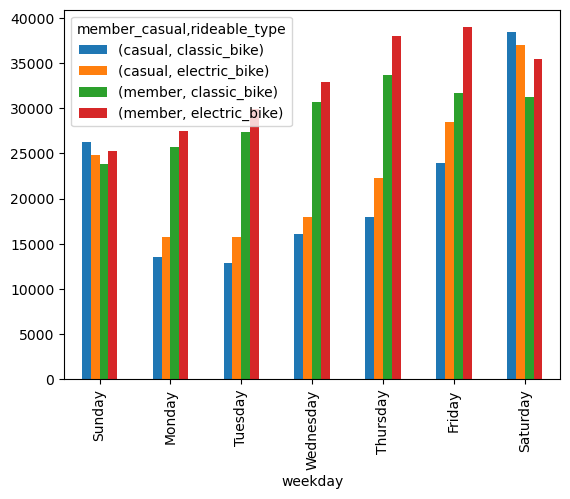

In [33]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [14]:
import folium

In [15]:
from folium.plugins import HeatMap

In [39]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [41]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [43]:
member_geo_data.head()

,start_lat,start_lng
8,41.874754,-87.649807
10,41.831274,-87.608799
12,41.918216,-87.656936
13,41.938330,-87.761660
14,41.943838,-87.671469


In [45]:
HeatMap(member_geo_data).add_to(m)

In [47]:
m.save('heatmapmember-August.html')

In [49]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [51]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [53]:
HeatMap(casual_geo_data).add_to(m1)

In [55]:
m1.save('heatmapcasual-August.html')

In [18]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [59]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
0,41.94,-87.67,41.94,-87.67
1,41.89,-87.62,41.89,-87.62
2,41.90,-87.67,41.90,-87.67
3,41.88,-87.64,41.88,-87.64
4,41.87,-87.62,41.87,-87.62


In [61]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m2)

In [62]:
m2.save('routesCasual-August.html')

In [12]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_route = member_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]

In [20]:
m3 = folium.Map(location=[42.50 , -82.50] , zoom_start = 10)

In [22]:
member_geo_route = member_geo_route.dropna()
for index in member_geo_route.index:
    route = [[member_geo_route.loc[index, 'start_lat'] ,member_geo_route.loc[index,'start_lng']] , [member_geo_route.loc[index,'end_lat'], member_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m3)

In [24]:
m3.save('routesMember-August.html')